<a href="https://colab.research.google.com/github/nnilayy/Unet/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import glob 
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import tensorflow as tf

## Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Dataset

In [5]:
import matplotlib.pyplot as plt
import cv2 
import glob 
import numpy as np
X=[]
y=[]
images=sorted(glob.glob('/content/drive/MyDrive/Balls/Images/*'))
masks=sorted(glob.glob('/content/drive/MyDrive/Balls/Masks/*'))

for image in images:
  image=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
  image=cv2.resize(image,(64,64))
  image=image/255
  image=np.array(image)
  X.append(image)

for mask in masks:
  mask=cv2.imread(mask,cv2.IMREAD_GRAYSCALE)
  mask=cv2.resize(mask,(64,64))
  mask=mask/255
  mask=np.array(mask)
  mask=np.where(mask>0.5,1,0).astype(mask.dtype)
  y.append(mask)

In [6]:
X=np.array(X)
y=np.array(y)

In [ ]:
len(images)
X.shape

## Visualizing Images and Masks

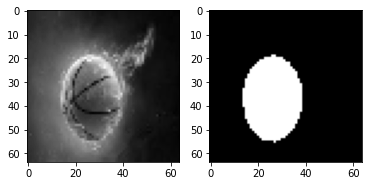

In [12]:
index=456
image=X[index]
mask=y[index]
plt.subplot(1, 2, 1)
plt.imshow(image,cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(mask,cmap='gray')
plt.show()

## Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input,Conv2D, MaxPooling2D, Resizing,AveragePooling2D, Flatten, Dropout, BatchNormalization, InputLayer, Reshape
model = Sequential()
model.add(InputLayer(input_shape=(64, 64, 1)))
model.add(Conv2D(64, 2, padding='same', activation="relu"))

model.add(Resizing(64, 64, interpolation='nearest'))

# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(8, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(4, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(1, 1, padding='same', activation="relu"))
# model.add(Resizing(64, 64, interpolation='bilinear'))

# model.add(Conv2D(16, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(8, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(4, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(1, 1, padding='same', activation="relu"))
# model.add(Resizing(64, 64, interpolation='bilinear'))

# model.add(Conv2D(16, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(8, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(4, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(1, 1, padding='same', activation="relu"))
# model.add(Resizing(64, 64, interpolation='bilinear'))

# model.add(Conv2D(16, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(8, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(4, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(1, 1, padding='same', activation="relu"))
# model.add(Resizing(64, 64, interpolation='bilinear'))
# model.add(Flatten())
# model.add(Dense(64, activation="relu"))
# model.add(Dense(4096, activation="relu"))
model.summary()

In [ ]:
from keras.models import Model
from keras.layers import concatenate
# image=Input(shape=(64, 64, 1))
# conv1=Conv2D(64, 3, padding='same', activation="relu")(image)
# av1=AveragePooling2D(2, padding='same')(conv1)
# conv2=Conv2D(32, 3, padding='same', activation="relu")(av1)
# resize=Resizing(64, 64, interpolation='bilinear')(conv2)
# conv3=Conv2D(1, 1, padding='same', activation="relu")(resize)
# conc=concatenate([conv1, resize])
# conv4=Conv2D(1, 1, padding='same', activation="relu")(conc)
# conv2=Conv2D(1, 1, padding='same', activation="relu")(conv1)
# conv3=Conv2D(1, 1, padding='same', activation="relu")(conc)

# resize=Resizing(64, 64, interpolation='bilinear')(conv2)
# av1=AveragePooling2D(2, padding='same')(conv1)
# conv2=Conv2D(16, 3, padding='same', activation="relu")(av1)
# av2=AveragePooling2D(2, padding='same')(conv2)
# conv3=Conv2D(8, 3, padding='same', activation="relu")(av2)
# av3=AveragePooling2D(2, padding='same')(conv3)
# conv4=Conv2D(1, 1, padding='same', activation="relu")(av3)

image=Input(shape=(64, 64, 1))
conv1=Conv2D(16, 4, padding='same', activation="relu")(image)
conv2=Conv2D(8, 2, padding='same', activation="relu")(conv1)
av1=AveragePooling2D(2, padding='same')(conv2)

conv3=Conv2D(16, 4, padding='same', activation="relu")(av1)
conv4=Conv2D(8, 2, padding='same', activation="relu")(conv3)
av2=AveragePooling2D(2, padding='same')(conv4)

conv5=Conv2D(16, 4, padding='same', activation="relu")(av2)
conv6=Conv2D(8, 2, padding='same', activation="relu")(conv5)
av3=AveragePooling2D(2, padding='same')(conv6)
resize=Resizing(64, 64, interpolation='bilinear')(av3)

conc=concatenate([conv1,resize])
conv5=Conv2D(1, 1, padding='same', activation="relu")(conc)

model=Model(inputs=image, outputs=conv5)
model.summary()

In [505]:
import tensorflow as tf
model.compile(loss="mse", 
              optimizer=tf.keras.optimizers.experimental.Adamax(learning_rate=1e-3),
              metrics='mean_absolute_error')
model.fit(X, y, steps_per_epoch=32, epochs=150, verbose=1)

Epoch 1/150
32/32 [==============================] - 2s 7ms/step - loss: 0.0316 - mean_absolute_error: 0.0712
Epoch 2/150
32/32 [==============================] - 0s 6ms/step - loss: 0.0301 - mean_absolute_error: 0.0675
Epoch 3/150
32/32 [==============================] - 0s 6ms/step - loss: 0.0305 - mean_absolute_error: 0.0693
Epoch 4/150
32/32 [==============================] - 0s 6ms/step - loss: 0.0296 - mean_absolute_error: 0.0682
Epoch 5/150
32/32 [==============================] - 0s 5ms/step - loss: 0.0297 - mean_absolute_error: 0.0669
Epoch 6/150
32/32 [==============================] - 0s 7ms/step - loss: 0.0291 - mean_absolute_error: 0.0667
Epoch 7/150
32/32 [==============================] - 0s 9ms/step - loss: 0.0290 - mean_absolute_error: 0.0671
Epoch 8/150
32/32 [==============================] - 0s 8ms/step - loss: 0.0290 - mean_absolute_error: 0.0661
Epoch 9/150
32/32 [==============================] - 0s 8ms/step - loss: 0.0287 - mean_absolute_error: 0.0659
Epoch 10/1

## Prediction

1/1 [==============================] - 0s 99ms/step


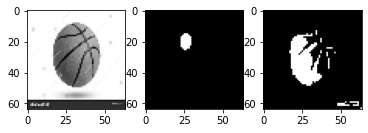

In [504]:
# Test Image
# index=223
# test=X[index]
# actual=y[index]
file='/content/images.jpg'
test=cv2.imread(file,cv2.IMREAD_GRAYSCALE)
test=cv2.resize(test,(64,64))
test=np.array(test)
image=test

# Prediction
prediction=model.predict(test.reshape(-1,64,64,1))[0]
prediction=np.where(prediction>0.3,1,0).astype(prediction.dtype)

#Subplots 
plt.subplot(1, 3, 1)
plt.imshow(image,cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(actual,cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(prediction,cmap='gray')
plt.show()
# test.reshape(-1,128,128,1)

## Prediction on Random Image

In [ ]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels, verbose=1)
print('Accuracy = %f' % test_acc)

In [ ]:
# mnist = tf.keras.datasets.mnist
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_images = train_images/255.0;
# test_images = test_images/255.0;

In [ ]:
# plt.imshow(test_images[0]*255,cmap='gray')